# Amir Abbas Kazemzadeh Farizhandi
# Student ID: 114131516
# H.W. 2

# Coding assignment 1

# Newton's algorithm 

First we should import the required packages:

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from scipy import misc
from sympy import *

In [2]:
def dx(f, x):
    return abs(0-f(x))

def newtons_method(f, df, x0, e):
    iteration_counter = 0
    delta = dx(f, x0)
    while delta > e:
        x0 = x0 - f(x0)/df(x0)
        delta = dx(f, x0)
        #print(x0,f(x0))
        iteration_counter += 1
    print ('Root is at: ', x0)
    print ('number of iteration is: ', iteration_counter)
    print ('f(x) at root is: ', f(x0))

In [3]:
x = Symbol('x')
g = (sym.log(x))/(1+x)

Now, we can compute $g'(x)$:

In [4]:
g_prime = g.diff(x)
g_prime

-log(x)/(x + 1)**2 + 1/(x*(x + 1))

In [5]:
g_doubleprime=g.diff(x, 2)
g_doubleprime

(2*log(x)/(x + 1)**2 - 2/(x*(x + 1)) - 1/x**2)/(x + 1)

In [6]:
g = lambdify(x, g)
g_prime = lambdify(x, g_prime)
g_doubleprime = lambdify(x, g_doubleprime)

In [7]:
g_prime(3)

0.014670065291576467

In [8]:
g_doubleprime(3)

-0.03511281042356601

Now, we can run Newton's method to find the root of $g^\prime(x)$ with starting point $x_0=3$:

In [9]:
x0 = 3
newtons_method(g_prime, g_doubleprime, x0, 1e-6)

Root is at:  3.591121458061283
number of iteration is:  4
f(x) at root is:  3.1427171975906276e-10


Now, we can plot the $g^\prime(x)$ and show the Newton method steps:

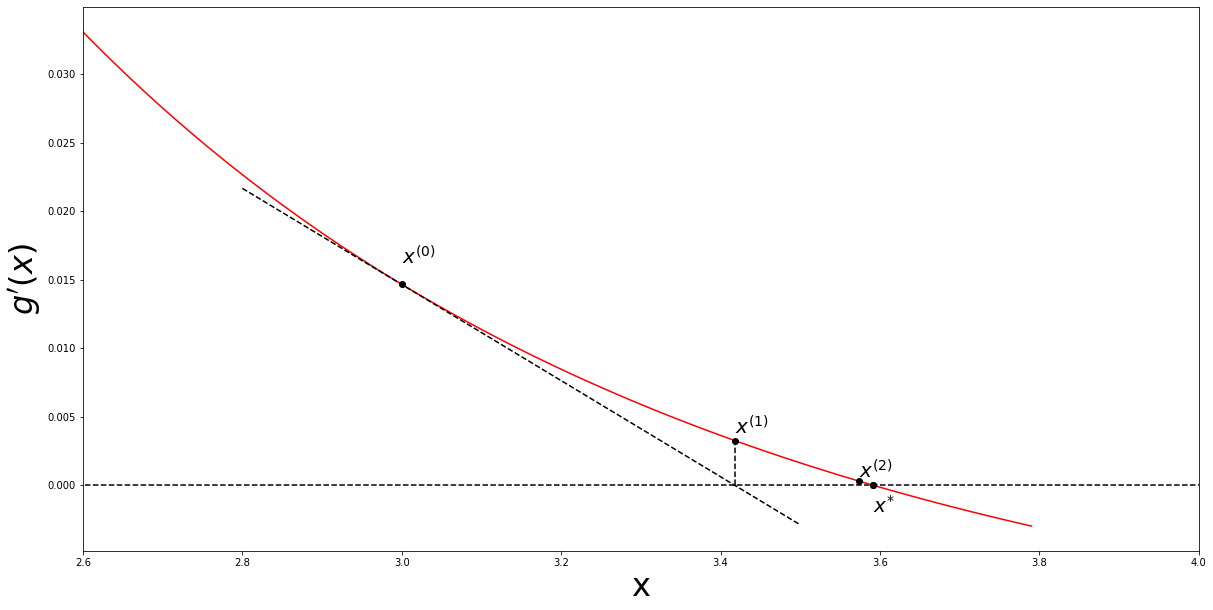

In [10]:
z = np.arange(2.6, 3.8, 0.01)

v = g_prime(z)
plt.figure(figsize=(20,10))
plt.plot(z, v,'r-')
plt.xlabel('x',fontsize=32)
plt.ylabel('$g^\prime(x)$',fontsize=32)
plt.hlines(y=0,xmin=0,xmax=5,color='k', linestyle='--')

text(3, 0.016670065291576467,
     r'$x^{(0)}$', verticalalignment='center',
     fontsize=20,color='k')
text(3.4177980946159363 , 0.0042581708664204956,
     r'$x^{(1)}$', verticalalignment='center',
     fontsize=20,color='k')
text(3.5740451974549705  , 0.00104514145913424579,
     r'$x^{(2)}$', verticalalignment='center',
     fontsize=20,color='k')
text(3.590946123623657 , - 0.0015,
     r'$x^{*}$', verticalalignment='center',
     fontsize=20,color='k')

plt.plot(3, 0.014670065291576467, 'ok')
plt.plot(3.4177980946159363 , 0.0032581708664204956, 'ok')
plt.plot(3.5740451974549705  , 0.0002914145913424579, 'ok')
plt.plot(3.590946123623657 , 2.961968419805394e-06, 'ok')
plt.plot(3.590946123623657 , 2.961968419805394e-06, 'ok')

t = np.linspace(2.8, 3.5, 1000)
plt.plot(t, -0.035113*t+0.12,color='k',linestyle='--');

plt.vlines(x=3.4177980946159363,ymin=0,ymax=0.0032581708664204956, linestyle='--')

xlim((2.6, 4))
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)
plt.show()

# Coding assignment 2

In [11]:
def newtons_method(f, df, x0, e):
    iteration_counter = 0
    delta = abs(0-f(x0))
    while delta > e:
        x0 = x0 - f(x0)/df(x0)
        delta = abs(0-f(x0))
        #print(x0,f(x0))
        iteration_counter += 1
    print ('Root is at: ', x0)
    print ('number of iteration is: ', iteration_counter)
    print ('f(x) at root is: ', f(x0))
    return x0

# (a) Graph the log likelihood function between −π and π. 

In [12]:
x= [3.91,4.85,2.28,4.06,3.7,4.04, 5.46, 3.53, 2.28, 1.96, 2.53, 3.88, 2.22, 3.47,4.82, 2.46, 2.99, 2.54, 0.52, 2.5]

In [13]:
len(x)

20

In [14]:
theta = np.linspace(-math.pi,math.pi,10000)
theta

array([-3.14159265, -3.14096427, -3.14033589, ...,  3.14033589,
        3.14096427,  3.14159265])

In [15]:
def loglikelihood(x,theta):
    l = np.zeros(len(theta))
    for i in range(0,len(theta)):
        for j in range(0,len(x)):
            l[i]+=np.log((1-np.cos(x[j]-theta[i]))/(2*math.pi))
    return l
    

In [16]:
l=loglikelihood(x,theta)

In [17]:
l[4999]

-31.344412050171865

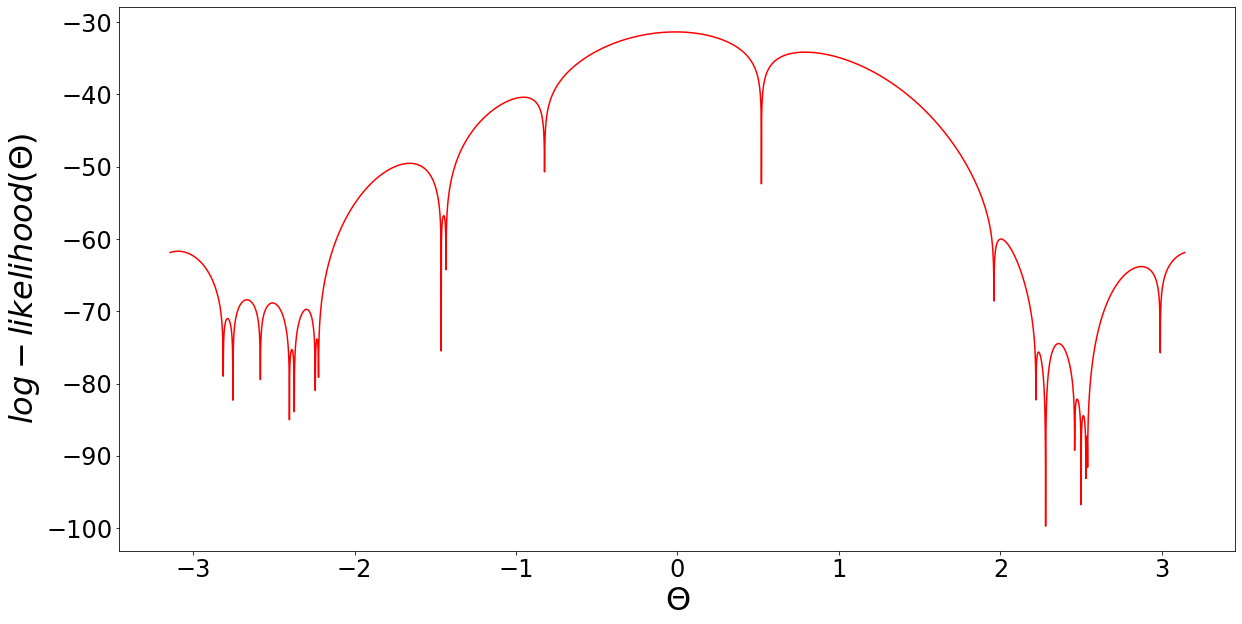

In [18]:
plt.figure(figsize=(20,10))
plt.plot(theta, l,'r-')
plt.xlabel('${\Theta}$',fontsize=32)
plt.ylabel('$log-likelihood({\Theta})$',fontsize=32)
plt.show()

 # (b) Find the method-of-moments estimator of θ. 

The method-of-moments estimator $\bar{{\theta}}$ is found by setting the mean function $\int x f(x) dx$ equal to the sample mean $\bar{X}$ and solving for ${\theta}$:

$${\mu}({\theta})=\frac{1}{2{\pi}}\int_{0}^{2{\pi}} x [1-\cos({x-{\theta}})] = {\pi}-\frac{1}{2{\pi}}\int_{0}^{2{\pi}} x [\cos({x-{\theta}})]
dx$$

Using integration by parts on the right-hand side above, we get:

$$\int_{0}^{2{\pi}} x [\cos({x-{\theta}})]=x [\sin({x-{\theta}})]|_{0}^{2{\pi}} - \int_{0}^{2{\pi}} [\sin({x-{\theta}})] = {2{\pi}} [\sin({{2{\pi}}-{\theta}})]$$

Next, recall that $\sin(−x) = \sin(x)$ and $\sin({2{\pi}}+x) = \sin(x)$. Putting everything together, we have:

$${\mu}({\theta}) = {\pi}-\frac{1}{2{\pi}}\int_{0}^{2{\pi}} x [\cos({x-{\theta}})]dx = {\pi}-\sin{\theta}$$

Based on the method-of-moments estimator $\bar{{\theta}}$ is found by setting the mean function $\int x f(x) dx$ equal to the sample mean $\bar{X}$:

$${\mu}({\theta})= \bar{X} \Rightarrow {\pi}-\sin{\theta}=\bar{X} \Rightarrow {\theta}=\arcsin({\pi}-\bar{X})$$

Now, we can calculate the $\bar{\theta}$:

In [19]:
thata_hat=arcsin(math.pi-mean(x))
thata_hat

-0.05844060614042408

# (c)  Find the MLE for θ using the Newton–Raphson method, using the result from (b) as the starting value. What solutions do you ﬁnd when you start at −2.7 and 2.7? 

Plotting the $l^\prime({\theta})$ can help to have a better understanding about problem. Therefore, first I will plot $l^\prime({\theta})$:

In [20]:
def loglikelihood_prime_graph(x,theta):
    l_prime_graph = np.zeros(len(theta))
    for i in range(0,len(theta)):
        for j in range(0,len(x)):
            l_prime_graph[i]+=(-np.sin(x[j]-theta[i]))/(1-np.cos(x[j]-theta[i]))
    return l_prime_graph

In [21]:
l_prime_graph=loglikelihood_prime_graph(x,theta)

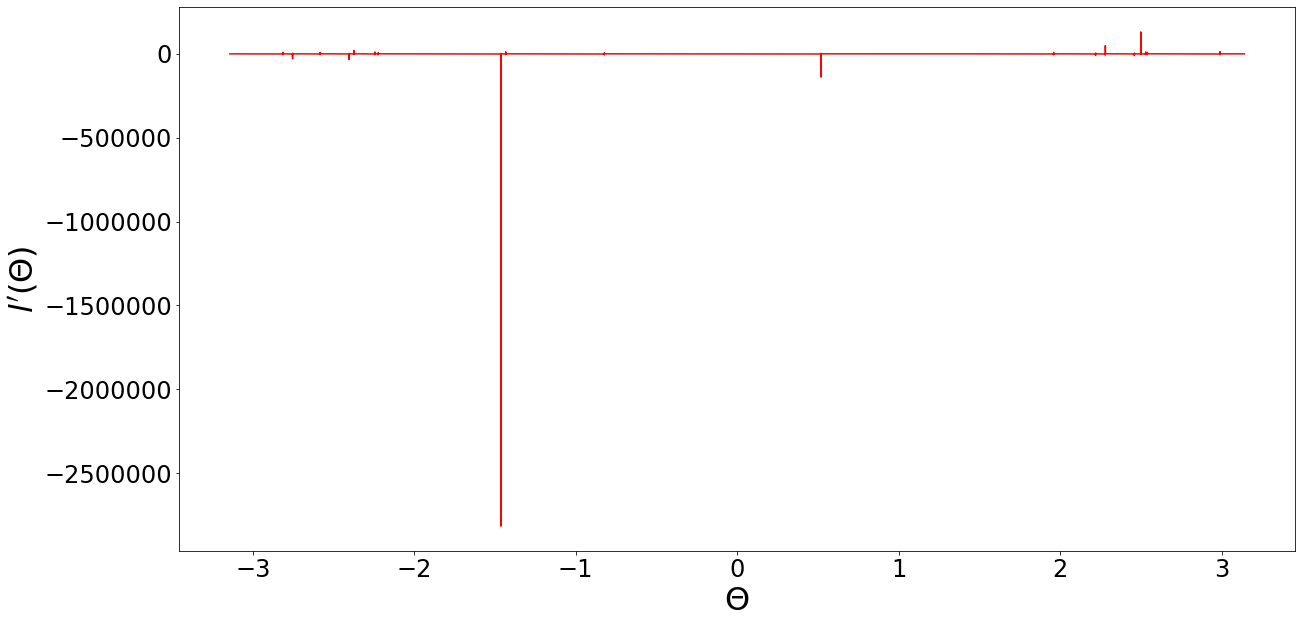

In [22]:
plt.figure(figsize=(20,10))
plt.plot(theta, l_prime_graph,'r-')
plt.xlabel('${\Theta}$',fontsize=32)
plt.ylabel('$l^\prime({\Theta})$',fontsize=32)
plt.show()

In [23]:
def loglikelihood_prime(theta):
    l_prime =0
    g= [3.91,4.85,2.28,4.06,3.7,4.04, 5.46, 3.53, 2.28, 1.96, 2.53, 3.88, 2.22, 3.47,4.82, 2.46, 2.99, 2.54, 0.52, 2.5]
    for j in range(0,len(g)):
        l_prime+=(-np.sin(g[j]-theta))/(1-np.cos(g[j]-theta))
    return l_prime

In [24]:
def loglikelihood_doubleprime(theta):
    l_doubleprime = 0
    g= [3.91,4.85,2.28,4.06,3.7,4.04, 5.46, 3.53, 2.28, 1.96, 2.53, 3.88, 2.22, 3.47,4.82, 2.46, 2.99, 2.54, 0.52, 2.5]
    for j in range(0,len(g)):
        l_doubleprime+=(-1)/(1-np.cos(g[j]-theta))
    return l_doubleprime

In [25]:
loglikelihood_prime(-0.0584)

1.005924046205911

In [26]:
loglikelihood_doubleprime(-0.0584)

-21.396191086058717

In [27]:
newtons_method(loglikelihood_prime, loglikelihood_doubleprime, -0.0584, 1e-6)

Root is at:  -0.011972002287432998
number of iteration is:  3
f(x) at root is:  -1.567634910770721e-13


-0.011972002287432998

In [28]:
newtons_method(loglikelihood_prime, loglikelihood_doubleprime, 2.7, 1e-6)

Root is at:  2.8730945142450826
number of iteration is:  5
f(x) at root is:  -1.2612133559741778e-12


2.8730945142450826

In [29]:
newtons_method(loglikelihood_prime, loglikelihood_doubleprime, -2.7, 1e-6)

Root is at:  -2.6666999271295535
number of iteration is:  3
f(x) at root is:  7.646932640437143e-07


-2.6666999271295535

# (d) Repeat part (c) using 200 equally spaced starting values between −π and π.Partition the interval between −π and π into sets of attraction. In other words, divide the set of starting values into separate groups, with each group corresponding to a separate unique outcome of the optimization (a local mode). Discuss your results. 

In [30]:
theta_hat = np.linspace(-math.pi,math.pi,200)
theta_hat

array([-3.14159265, -3.11001886, -3.07844506, -3.04687127, -3.01529747,
       -2.98372368, -2.95214988, -2.92057608, -2.88900229, -2.85742849,
       -2.8258547 , -2.7942809 , -2.76270711, -2.73113331, -2.69955952,
       -2.66798572, -2.63641193, -2.60483813, -2.57326433, -2.54169054,
       -2.51011674, -2.47854295, -2.44696915, -2.41539536, -2.38382156,
       -2.35224777, -2.32067397, -2.28910017, -2.25752638, -2.22595258,
       -2.19437879, -2.16280499, -2.1312312 , -2.0996574 , -2.06808361,
       -2.03650981, -2.00493602, -1.97336222, -1.94178842, -1.91021463,
       -1.87864083, -1.84706704, -1.81549324, -1.78391945, -1.75234565,
       -1.72077186, -1.68919806, -1.65762426, -1.62605047, -1.59447667,
       -1.56290288, -1.53132908, -1.49975529, -1.46818149, -1.4366077 ,
       -1.4050339 , -1.3734601 , -1.34188631, -1.31031251, -1.27873872,
       -1.24716492, -1.21559113, -1.18401733, -1.15244354, -1.12086974,
       -1.08929595, -1.05772215, -1.02614835, -0.99457456, -0.96

In [31]:
opt_out=zeros(1,len(theta_hat))

In [32]:
for j in range(0,len(theta_hat)):
    opt_out[j]=newtons_method(loglikelihood_prime, loglikelihood_doubleprime, theta_hat[j], 1e-2)

Root is at:  -3.0931101496279876
number of iteration is:  2
f(x) at root is:  0.002675497593626286
Root is at:  -3.0930918123368505
number of iteration is:  2
f(x) at root is:  1.1972206041210853e-05
Root is at:  -3.0930917353073433
number of iteration is:  2
f(x) at root is:  7.836808282313257e-07
Root is at:  -3.093092026619533
number of iteration is:  2
f(x) at root is:  4.3096742672776855e-05
Root is at:  -3.0931110409601095
number of iteration is:  2
f(x) at root is:  0.0028049670776533198
Root is at:  -3.0930917379049427
number of iteration is:  3
f(x) at root is:  1.16098175739765e-06
Root is at:  -3.0930917848521444
number of iteration is:  3
f(x) at root is:  7.980056106138278e-06
Root is at:  -3.0931055500115185
number of iteration is:  3
f(x) at root is:  0.002007387998432808
Root is at:  -3.093091737779883
number of iteration is:  4
f(x) at root is:  1.1428168411597994e-06
Root is at:  -3.093125076705219
number of iteration is:  4
f(x) at root is:  0.00484373666644311
Root 

In [33]:
opt_out

Matrix([[-3.09311014962799, -3.09309181233685, -3.09309173530734, -3.09309202661953, -3.09311104096011, -3.09309173790494, -3.09309178485214, -3.09310555001152, -3.09309173777988, -3.09312507670522, -3.09309187315362, -2.78616676348567, -2.78616675332119, -2.66670015427901, -2.66669992691103, -2.66670055249516, -2.66669992625289, -2.66669988370844, -2.50761977720666, -2.50761426699408, -2.50761322733073, -2.50762551811702, -2.50761800504629, -2.5076132610235, -2.388200491821, -2.29725601256654, -2.29725621911551, -2.29725326611022, -2.29725621886814, -2.23216729205894, -1.65827203223126, -1.65828258843137, -1.65828051551004, -1.65827829200693, -1.6582813688699, -1.65827068554431, -1.65827894421642, -1.65828296259829, -1.65825894683076, -1.65828316358073, -1.65828282242603, -1.65827671137462, -1.6582707292413, -1.65827446095668, -1.6582806982933, -1.65828300699288, -1.65826090494418, -1.65828183754835, -1.65823676599929, -1.6582804955861, -1.65828318798967, -1.65827131647299, -1.6582772

In [34]:
theta_hat[99]

-0.015786897756732365

In [35]:
theta_hat[100]

0.01578689775673281

## The method-of-moments estimator $\bar{{\theta}}$ belongs to interval -0.015786897756732365 and 0.01578689775673281.

# (e) Find two starting values,as nearly equalas you can,for which the Newton–Raphson method converges to two different solutions.


 the solutions corresponding to the subintervals 161 and 162 are quite diﬀerent. In an attempt to ﬁnd starting values very near to one another for which Newton’s method converges to diﬀerent solutions, we take starting values near the boundary between 1.9417884240781138 and 1.9733622195915785. After several trials, we ﬁnd that 

In [36]:
opt_out[161]

0.790470122749936

In [37]:
opt_out[162]

2.00364478102441

In [38]:
theta_hat[161]

1.9417884240781138

In [39]:
theta_hat[162]

1.9733622195915785

In [40]:
print('The theta for starting point 1.9417 is :',newtons_method(loglikelihood_prime, loglikelihood_doubleprime, 1.9417, 1e-6))

Root is at:  0.7906013104099675
number of iteration is:  9
f(x) at root is:  1.8141044222375058e-13
The theta for starting point 1.9417 is : 0.7906013104099675


In [41]:
print('The theta for starting point 1.9733 is :',newtons_method(loglikelihood_prime, loglikelihood_doubleprime, 1.9733, 1e-6))

Root is at:  2.0036448887745872
number of iteration is:  6
f(x) at root is:  3.14327230910294e-10
The theta for starting point 1.9733 is : 2.0036448887745872
